In [2]:
import numpy as np
import matplotlib.pyplot as plt

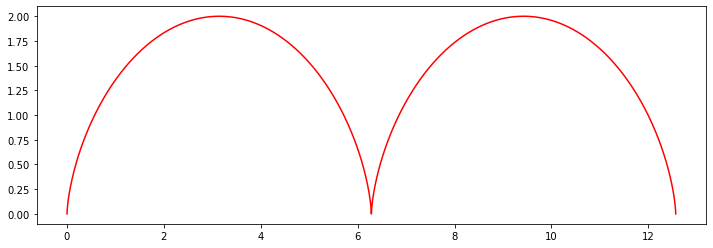

In [6]:
r=1
t = np.linspace(0, 4*np.pi, 2000)
x = r * (t - np.sin(t))
y = r * (1 - np.cos(t))

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, y, 'r')
plt.plot()
plt.show()

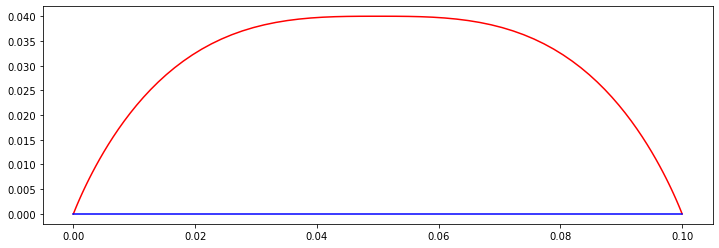

In [3]:
beta = 0.5
T = 0.4
S = 0.2
H = 0.04
T_sw = T*(1-beta)
T_st = T*beta

t_sw = np.linspace(0, T_sw, 100)
t_st = np.linspace(T_sw, T, 100)

x_sw = (1-beta)*S*(t_sw/T_sw-0.5/np.pi*np.sin(2*np.pi*t_sw/T_sw))
f_e = t_sw/T_sw - 0.25/np.pi*np.sin(4*np.pi*t_sw/T_sw)
y_sw = H *(np.sign(0.5*T_sw-t_sw)*(2*f_e-1)+1)

x_st = beta*S*((T-t_st)/T_st+0.5/np.pi*np.sin(2*np.pi*t_st/T_st))
y_st = len(t_st) * [0]

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x_sw, y_sw, 'r')
ax.plot(x_st, y_st, 'b')
plt.plot()
plt.show()

In [48]:
def forward0(l, angle_1):
  return [-l*np.sin(angle_1), -l*np.cos(angle_1)]

def forward(l1, l2, angle_1, angle_2):
  x0, z0 = forward0(l1, angle_1)
  dx, dz = forward0(l2, angle_1+angle_2)
  return [x0+dx, z0+dz]

def inverse(type, l1, l2, x, z):
  L_square = x**2+z**2
  L = np.sqrt(L_square)
  sign = np.sign(type)
  d = delta(type, x, z)
  angle_2 = -sign*np.arccos((L_square-l1**2-l2**2)/(2*l1*l2))
  angle_1 = sign*np.arcsin(-sign*l2*np.sin(angle_2)/L) - np.arctan2(z,x) - np.pi/2 + d*2*np.pi
  return [angle_1, angle_2]

def delta(type, x, z):
    if np.sign(type) == -1 and x < 0 and z >= 0:
        return 1
    else:
        return 0

def test(type, angled1, angled2):
    #l1 = 0.209
    #l2 = 0.180
    l1 = 0.2
    l2 = 0.2
    angle_1 = np.math.radians(angled1)
    angle_2 = np.math.radians(angled2)

    x,z = forward(l1, l2, angle_1, angle_2)
    angle_1_, angle_2_ = inverse(type, l1, l2, x, z)

    print(np.math.degrees(angle_1-angle_1_), np.math.degrees(angle_2-angle_2_))

# 肘式关节
test(1, 35, -60)
test(1, 30, -61)
test(1, 15, -60)
test(1, -120, -60)
test(1, -90, -90)
test(1, 120, -60)
print()
# 膝式关节
test(-1, -35, 60)
test(-1, -30, 61)
test(-1, -15, 60)
test(-1, 120, 60)
test(-1, 85, 90)
test(-1, -120, 60)

-1.2722218725854067e-14 -1.2722218725854067e-14
6.3611093629270335e-15 -2.5444437451708134e-14
3.1805546814635168e-15 -1.2722218725854067e-14
0.0 1.2722218725854067e-14
0.0 0.0
-2.5444437451708134e-14 2.5444437451708134e-14

-1.2722218725854067e-14 1.2722218725854067e-14
-3.180554681463517e-14 2.5444437451708134e-14
-1.5902773407317584e-14 1.2722218725854067e-14
2.5444437451708134e-14 -1.2722218725854067e-14
0.0 0.0
0.0 -2.5444437451708134e-14
